In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 146 kB/s            


In [2]:
# 그래프 크기 설정
def set_size_fig(fig_, w_, h_, dpi = 200):
    fig_.set_figwidth(w_)
    fig_.set_figheight(h_)
    fig_.set_dpi(dpi)
    
# fig subplot padding 조절
def set_pad_subplot_fig(top=None, left=None, bottom=None, right=None,  
                        wspace=None, hspace=None):
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

#
def ratation_tick(angle = 0):
    plt.xticks(rotation = angle)


# 여러개 
def make_graph_bar(data_x, data_y, num_row, num_col, idx_axes, fig=None, 
                   title = '', weight_title = 'bold', 
                   dpi = 200, color_bar = "#d0d0d0", width_bar = 0.6, color_edge = 'black'):
    if not fig:
        fig = plt.figure()
    ax = fig.add_subplot(num_row, num_col, idx_axes)
    ax.bar(data_x, data_y, color=color_bar, width=width_bar, edgecolor=color_edge)
    ax.set_title(title, fontweight=weight_title)
    return fig, ax

In [3]:
def split_multi_data_in_col(df, name_col, str_split):
    num_df = len(df)
    result_df = df.drop(index=df.index)
    for idx in range(num_df):
        row = df.iloc[idx]
        keys = row.index
        vals = [[val]for val in row.values]
        dic_row = dict(zip(keys, vals))

        val_col = row[name_col]
        if type(row[name_col]) != str:
            df_row = pd.DataFrame(dic_row)
            result_df = pd.concat([result_df, df_row])
        else:
            val_col = row[name_col].split(str_split)
            for val in val_col:
                dic_row[name_col] = val
                df_row = pd.DataFrame(dic_row)
                result_df = pd.concat([result_df, df_row])
    return result_df.reset_index().drop('index', axis=1)

In [4]:
PATH_DATA_TITLES = '~/aiffel/netflix/data/netflix_titles.csv'
data_titles = pd.read_csv(PATH_DATA_TITLES)

# type별 Data
data_movie = data_titles.loc[data_titles.type == 'Movie']
data_tv = data_titles.loc[data_titles.type == 'TV Show']

# 12개의 feature로 구성된 netflix dataset
- show_id : Unique ID for every Movie / Tv Show (모든 영화/TV 프로그램의 고유 ID)
- type : Identifier - A Movie or TV Show (식별자 - 영화 또는 TV 프로그램)
- title : Title of the Movie / Tv Show (영화/TV 쇼의 제목)
- director : Director of the Movie (영화 감독)
- cast : Actors involved in the movie / show (영화/쇼에 참여한 배우들)
- country : Country where the movie / show was produced (영화/쇼가 제작된 국가)
- data_added : Date it was added on Netflix (넷플릭스에 추가된 날짜)
- release_year : Actual Release year of the movie / show (영화/쇼 실제 공개 연도)
- rating : TV Rating of the movie / show (영화/쇼의 시청 등급)
- duration : Total Duration - in minutes or number of seasons (총 기간 - 분 또는 시즌 수)
- listed_in : Genere (장르)
- description : The summary description (요약 설명)

# Exploratory data analysis

## type : A Movie vs TV Show

In [5]:
df_type = data_titles['type'].value_counts()
df_type = df_type.to_frame()
df_type.columns=['counts']
df_type

,counts
Movie,6131
TV Show,2676


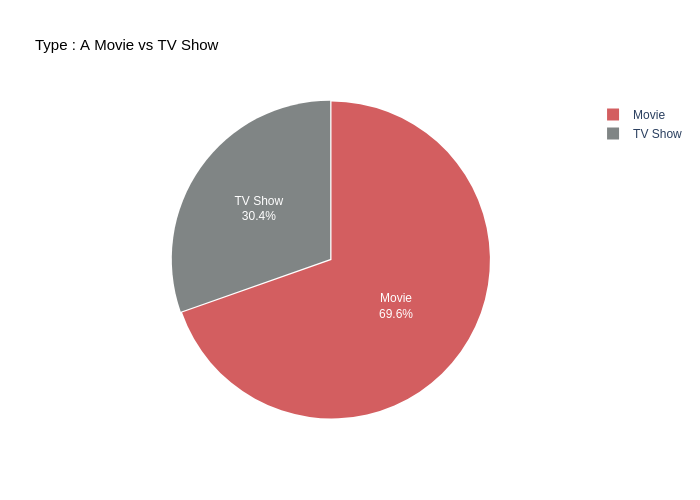

In [6]:
colors = ['rgb(211,94,96)', 'rgb(128,133,133)']

data = go.Pie(labels=df_type.index, 
              values=df_type['counts'], 
              pull=[0, 0.01], 
              textinfo='label+percent', 
              hoverinfo='label+percent+value', 
              marker_colors=colors, 
              insidetextfont=dict(color='white')
             )
layout = go.Layout(title='Type : A Movie vs TV Show', 
                   titlefont=dict(size=15, color='black')
                  )

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="png")

전체 data중 type column에서의 movie 와 tv show 차지 비율
- Tv show : 30.4%
- Movie : 69.6%

## Null check


- 데이터셋 각 칼럼당 null data 확인
- 시각화

In [7]:
col_list = []
rate_list = []

print('original_data :')
for col in data_titles.columns:
    rate_null = (data_titles[col].isnull().sum() / data_titles[col].shape[0])*100
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, rate_null)
    if rate_null >= 0.01:
        col_list.append(col)
        rate_list.append(rate_null)
    print(msg)

original_data :
column :    show_id	 Percent of NaN value : 0.00%
column :       type	 Percent of NaN value : 0.00%
column :      title	 Percent of NaN value : 0.00%
column :   director	 Percent of NaN value : 29.91%
column :       cast	 Percent of NaN value : 9.37%
column :    country	 Percent of NaN value : 9.44%
column : date_added	 Percent of NaN value : 0.11%
column : release_year	 Percent of NaN value : 0.00%
column :     rating	 Percent of NaN value : 0.05%
column :   duration	 Percent of NaN value : 0.03%
column :  listed_in	 Percent of NaN value : 0.00%
column : description	 Percent of NaN value : 0.00%


- 가장 많은 null data를 가진 칼럼 : director(29.91%)
- cast, country 각각 약 9.4%
- 그 외 date_added, rating, duration

In [8]:
# feature - null 비율  dataframe 생성
col_name = ['feature', 'null rate']
rate_df = pd.DataFrame((zip(col_list, rate_list)), columns=col_name)
rate_df

,feature,null rate
0,director,29.908028
1,cast,9.367549
2,country,9.435676
3,date_added,0.113546
4,rating,0.045418
5,duration,0.034064


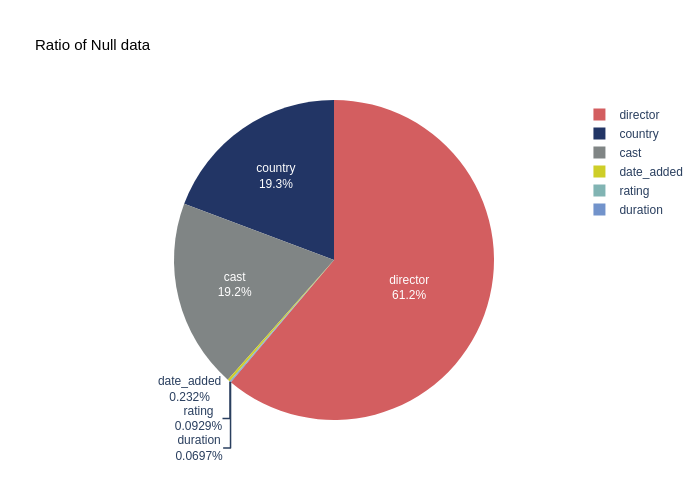

In [9]:
# Ratio of null data 시각화
colors = ['rgb(211,94,96)', 'rgb(128,133,133)', 'rgb(34, 53, 101)', 'rgb(206, 206, 40)', 'rgb(129, 180, 179)', 'rgb(114,147,203)']

data = go.Pie(labels=rate_df['feature'], 
              values=rate_df['null rate'], 
#               pull=[0, 0.01], 
              textinfo='label+percent', 
              hoverinfo='label+percent+value', 
              marker_colors=colors, 
              insidetextfont=dict(color='white')
             )
layout = go.Layout(title='Ratio of Null data', 
                   titlefont=dict(size=15, color='black')
                  )

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="png")

null 값을 많이 차지하는 director, country, cast만 따로 확인해보자

### director, cast, country null data check
그래프 결측치에서 tv랑 무비의 비율 보여주기
-> tv쪽에 결측치가 많다

In [10]:
movie_col_list = []
movie_rate_list = []
tv_col_list = []
tv_rate_list = []

print('\ndata_movie :')    
for col in data_movie.columns:  
    rate_null = (data_movie[col].isnull().sum() / data_movie[col].shape[0])*100
    msg_movie = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, rate_null)
    if rate_null >= 3.00:
        movie_col_list.append(col)
        movie_rate_list.append(rate_null)
    print(msg_movie)
      
print('\ndata_tv')
for col in data_tv.columns:
    rate_null = (data_tv[col].isnull().sum() / data_tv[col].shape[0])*100
    msg_tv = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, rate_null)
    if rate_null >= 13.00:
        tv_col_list.append(col)
        tv_rate_list.append(rate_null)
    print(msg_tv)


data_movie :
column :    show_id	 Percent of NaN value : 0.00%
column :       type	 Percent of NaN value : 0.00%
column :      title	 Percent of NaN value : 0.00%
column :   director	 Percent of NaN value : 3.07%
column :       cast	 Percent of NaN value : 7.75%
column :    country	 Percent of NaN value : 7.18%
column : date_added	 Percent of NaN value : 0.00%
column : release_year	 Percent of NaN value : 0.00%
column :     rating	 Percent of NaN value : 0.03%
column :   duration	 Percent of NaN value : 0.05%
column :  listed_in	 Percent of NaN value : 0.00%
column : description	 Percent of NaN value : 0.00%

data_tv
column :    show_id	 Percent of NaN value : 0.00%
column :       type	 Percent of NaN value : 0.00%
column :      title	 Percent of NaN value : 0.00%
column :   director	 Percent of NaN value : 91.41%
column :       cast	 Percent of NaN value : 13.08%
column :    country	 Percent of NaN value : 14.61%
column : date_added	 Percent of NaN value : 0.37%
column : release_year

전체 데이터의 director null 값 30% 중 tv show가 91% 를 차지한다 
- tv show의 경우 director가 의미없음
- 상대적으로 tv가 movie보다 null data가 더 많다


In [11]:
# movie : feature - null 비율  dataframe 생성
movie_col_name = ['feature', 'null rate']
movie_rate_df = pd.DataFrame((zip(movie_col_list, movie_rate_list)), columns=col_name)
movie_rate_df

,feature,null rate
0,director,3.066384
1,cast,7.747513
2,country,7.176643


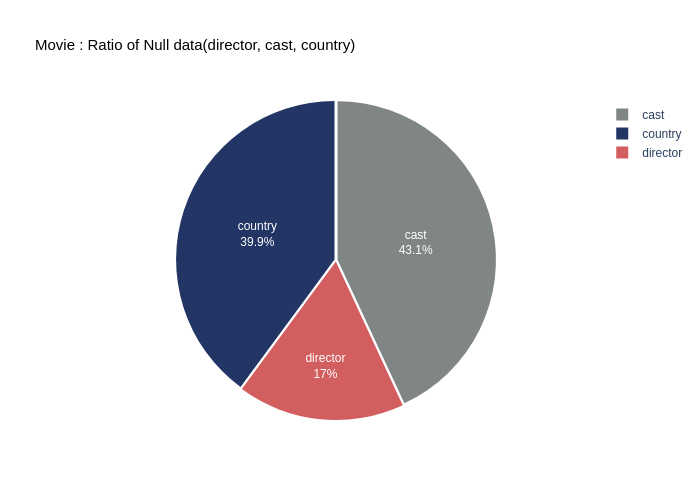

In [12]:
# movie : director, cast, country of null data 시각화
colors = ['rgb(211,94,96)', 'rgb(128,133,133)', 'rgb(34, 53, 101)', 'rgb(206, 206, 40)', 'rgb(129, 180, 179)', 'rgb(114,147,203)']

movie_data = go.Pie(labels=movie_rate_df['feature'], 
              values=movie_rate_df['null rate'], 
              pull=[0.01, 0.01, 0.01], 
              textinfo='label+percent', 
              hoverinfo='label+percent+value+name', 
              marker_colors=colors, 
              insidetextfont=dict(color='white'),
              name ='Movie'
             )
layout = go.Layout(title='Movie : Ratio of Null data(director, cast, country)', 
                   titlefont=dict(size=15, color='black')
                  )

fig = go.Figure(data=movie_data, layout=layout)
fig.show(renderer="png")

In [13]:
# tv : feature - null 비율  dataframe 생성
tv_col_name = ['feature', 'null rate']
tv_rate_df = pd.DataFrame((zip(tv_col_list, tv_rate_list)), columns=col_name)
tv_rate_df

,feature,null rate
0,director,91.405082
1,cast,13.079223
2,country,14.611360


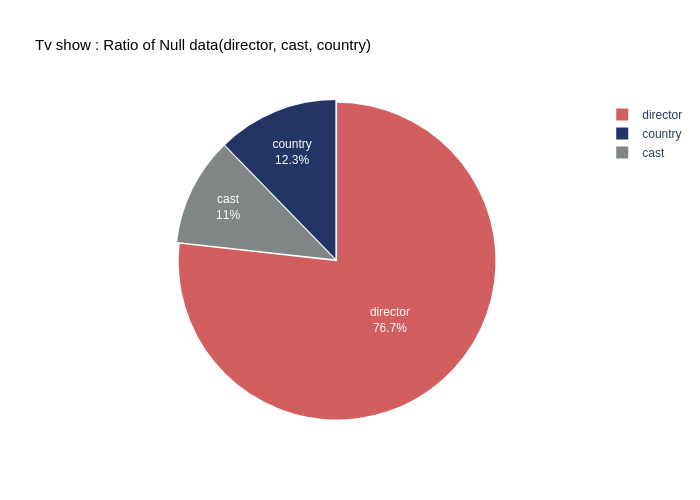

In [14]:
# Tv show : director, cast, country of null data 시각화
colors = ['rgb(211,94,96)', 'rgb(128,133,133)', 'rgb(34, 53, 101)', 'rgb(206, 206, 40)', 'rgb(129, 180, 179)', 'rgb(114,147,203)']

tv_data = go.Pie(labels=tv_rate_df['feature'], 
              values=tv_rate_df['null rate'], 
              pull=[0.01, 0.01, 0.01], 
              textinfo='label+percent', 
              hoverinfo='label+percent+value+name', 
              marker_colors=colors, 
              insidetextfont=dict(color='white'),
              name = 'Tv show'
             )
layout = go.Layout(title='Tv show : Ratio of Null data(director, cast, country)', 
                   titlefont=dict(size=15, color='black')
                  )

fig = go.Figure(data=tv_data, layout=layout)
fig.show(renderer="png")

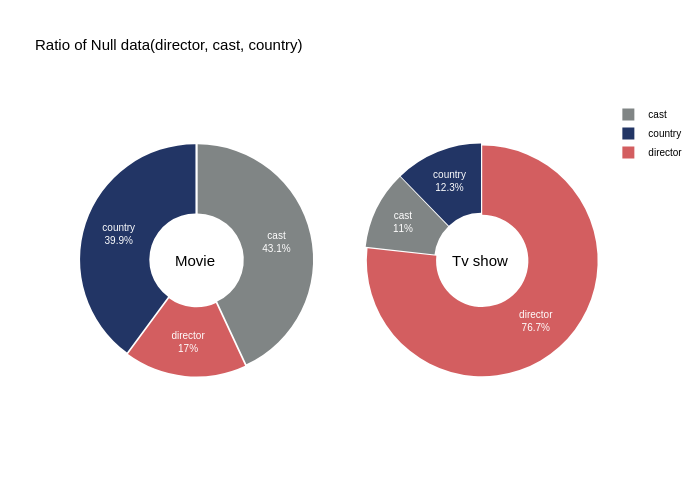

In [61]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(movie_data, 1, 1)
fig.add_trace(tv_data, 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(title_text='Ratio of Null data(director, cast, country)', 
                  titlefont=dict(size=15, color='black'), 
                  font=dict(size=10, color='black'),
                  annotations=[dict(text='Movie', x=0.18, y=0.5, font_size=15, showarrow=False),
                               dict(text='Tv show', x=0.83, y=0.5, font_size=15, showarrow=False)]
                  )
fig.show(renderer="png")

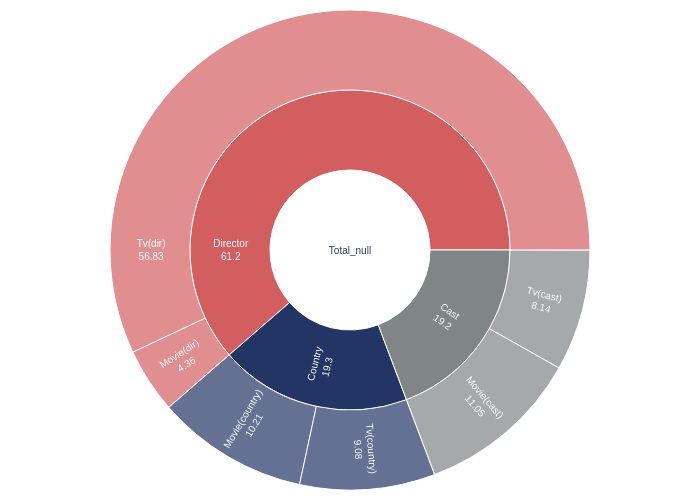

In [16]:
# director, country, cast null 값 중 tv / movie 비율 시각화

colors = ['white', 'rgb(211,94,96)', 'rgb(34, 53, 101)', 'rgb(128,133,133)']

dcc = go.Figure(go.Sunburst(
    labels=["Total_null", "Director", "Country", "Cast", "Movie(dir)", "Tv(dir)", "Tv(country)", "Movie(country)", "Tv(cast)", "Movie(cast)"],
    parents=["", "Total_null", "Total_null", "Total_null", "Director", "Director", "Country", "Country", "Cast", "Cast" ],
    values=["", 61.2, 19.3, 19.2, 4.36, 56.83, 9.08, 10.21, 8.14, 11.05],
    hovertemplate='<b>%{label} </b> <br> rate: %{value:.2f}%',
    insidetextorientation='radial',
    insidetextfont=dict(color='white'),
    branchvalues='total',
    marker=dict(colors=colors),
    name='',
    ))

fig = go.Figure(data=dcc)
fig.update_layout(margin = dict(t=10, l=10, r=10, b=10))
fig.update_traces(textinfo='label+value', textfont_size=10,
                  marker=dict(colors=colors), 
#                   line=dict(color='white', width=2))
                 )
# fig.update_layout(title='Director, Cast, Country null data', titlefont=dict(size=15, color='black'))
fig.show(renderer="png")

#### total null
1. director : total null 의 61.20%를 차지한다
     - tv show : 56.83
          - 가장 많은 null 값을 차지, 특히 tv show에서 약 90프로 정도 / total null의 반 이상을 차지한다
          - 이유를 생각해보자
     - movie : 4.36
          - movie의 경우 감독이 있는게 대부분인데 어떤 장르에서 특별히 null이 발생하는지 확인해 볼 필요가 있다
          - listed_in 칼럼과의 상관관계 찾아보기

2. country : total null의 19.3%
      - tv show : 10.21
      - movie : 9.08
        
3. cast : total null의 19.2%
      - tv show : 8.14
      - movie : 11.05
        

## director null 분석(director, listed_in, type)

- 특히 director에 null이 많은 이유 분석
- type 과 listed_in 연관성 ?

In [17]:
# director null 분석
# director null이 많은 이유?
# 'type'과 'listed_in'와 연관이 높았다

# director null 변수
null_director = data_titles[data_titles['director'].isnull()]
cnt_type_null_director = null_director['type'].value_counts()
print(cnt_type_null_director)

print('\n')
cnt_genre_null_director = null_director['listed_in'].value_counts()
print(cnt_genre_null_director)

TV Show    2446
Movie       188
Name: type, dtype: int64


Kids' TV                                              214
International TV Shows, TV Dramas                     113
Reality TV                                             94
Crime TV Shows, International TV Shows, TV Dramas      92
Kids' TV, TV Comedies                                  91
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
British TV Shows, Kids' TV, TV Thrillers                1
Crime TV Shows, International TV Shows, Reality TV      1
Docuseries, Reality TV, Teen TV Shows                   1
Dramas, International Movies                            1
Name: listed_in, Length: 272, dtype: int64


### Tv show

In [18]:
# print('\n')
cnt_type_null_director = null_director[null_director['type']=='TV Show']['listed_in'].value_counts()
cnt_type_null_director_df = cnt_type_null_director.to_frame()
cnt_type_null_director_df.columns=['counts']
cnt_type_null_director_df
# Tv show중 null이 많은 genre
# kis 관련 프로그램이 director가 음다

,counts
Kids' TV,214
"International TV Shows, TV Dramas",113
Reality TV,94
"Crime TV Shows, International TV Shows, TV Dramas",92
"Kids' TV, TV Comedies",91
...,...
"Crime TV Shows, International TV Shows, Reality TV",1
"Docuseries, Reality TV, Teen TV Shows",1
"TV Comedies, TV Dramas, TV Sci-Fi & Fantasy",1
"Anime Series, Stand-Up Comedy & Talk Shows",1


In [19]:
# tv show 중 null이 많은 genre 10개
cnt_10 = cnt_type_null_director[:10]
cnt_10 = cnt_10.to_frame()
cnt_10.columns=['counts']
cnt_10

,counts
Kids' TV,214
"International TV Shows, TV Dramas",113
Reality TV,94
"Crime TV Shows, International TV Shows, TV Dramas",92
"Kids' TV, TV Comedies",91
"International TV Shows, Romantic TV Shows, TV Dramas",88
"Anime Series, International TV Shows",83
"International TV Shows, Romantic TV Shows, TV Comedies",82
Docuseries,68
TV Comedies,67


- director null값 중 listed_in(장르)만 뽑아보니까 TV컨텐츠가 많은 것을 알 수 있다
- type, listed_in, derector null값의 상관관계
- 특히 kids tv가 214개로 가장 많다 = 키즈 컨텐츠는 director가 없을 확률이 높음
- Tv show 중 null이 많은 장르 = kids 관련 컨텐츠

In [20]:
# 상위 10개 장르가 전체 null 값에서 차지하는 비율
tng_rate_list = []

for i in cnt_10['counts']:    
    rate_tng = (i / 2446)*100
    tng_rate_list.append(rate_tng)

# tv show 중 null이 많은 genre 비율 확인 (10개) 
cnt_10_df = cnt_10.assign(rate = tng_rate_list)
cnt_10_df

,counts,rate
Kids' TV,214,8.748978
"International TV Shows, TV Dramas",113,4.619787
Reality TV,94,3.843009
"Crime TV Shows, International TV Shows, TV Dramas",92,3.761243
"Kids' TV, TV Comedies",91,3.720360
"International TV Shows, Romantic TV Shows, TV Dramas",88,3.597711
"Anime Series, International TV Shows",83,3.393295
"International TV Shows, Romantic TV Shows, TV Comedies",82,3.352412
Docuseries,68,2.780049
TV Comedies,67,2.739166


In [21]:
print(cnt_10_df['rate'].sum())

40.556009811937855


- director null값이 가장 많은 10개 장르가 tv null 데이터의 40% 정도 차지한다

In [22]:
# tv show에서 director가 없는 kids 컨텐츠 예시(10개)
# 이미지 보여주기? ??
condi = (null_director['type']=='TV Show') & (null_director['listed_in']=='Kids\' TV')
title_tv_null_director = null_director[condi]['title'][:10]
print(title_tv_null_director)

34     Tayo and Little Wizards
39                Chhota Bheem
65                Numberblocks
89                 Mighty Raju
100    Tobot Galaxy Detectives
111                   Sharkdog
123                  Luv Kushh
153                 Kid-E-Cats
254        Go! Go! Cory Carson
263          Mother Goose Club
Name: title, dtype: object


### Movie

In [23]:
# movie 중 null이 많은 장르
cnm_type_null_director = null_director[null_director['type']=='Movie']['listed_in'].value_counts()
cnm_type_null_director_df = cnm_type_null_director.to_frame()
cnm_type_null_director_df.columns=['counts']
cnm_type_null_director_df

,counts
Documentaries,25
Stand-Up Comedy,25
Movies,23
Children & Family Movies,22
Comedies,9
"Documentaries, International Movies",7
"Dramas, International Movies, Romantic Movies",6
"Documentaries, Music & Musicals",6
"Children & Family Movies, Comedies",5
"Documentaries, LGBTQ Movies",4


- Documentaries가 25개, stand_up comedy가 25개

In [24]:
# movie 중 null이 많은 genre 10개
cnm_10 = cnm_type_null_director[:10]
cnm_10 = cnm_10.to_frame()
cnm_10.columns=['counts']
cnm_10

,counts
Documentaries,25
Stand-Up Comedy,25
Movies,23
Children & Family Movies,22
Comedies,9
"Documentaries, International Movies",7
"Dramas, International Movies, Romantic Movies",6
"Documentaries, Music & Musicals",6
"Children & Family Movies, Comedies",5
"Documentaries, LGBTQ Movies",4


In [25]:
# 상위 10개 장르가 전체 null 값에서 차지하는 비율
mng_rate_list = []

for i in cnm_10['counts']:    
    rate_mng = (i / 188)*100
    mng_rate_list.append(rate_mng)

# tv show 중 null이 많은 genre 비율 확인 (10개) 
cnm_10_df = cnm_10.assign(rate = mng_rate_list)
cnm_10_df

,counts,rate
Documentaries,25,13.297872
Stand-Up Comedy,25,13.297872
Movies,23,12.234043
Children & Family Movies,22,11.702128
Comedies,9,4.787234
"Documentaries, International Movies",7,3.723404
"Dramas, International Movies, Romantic Movies",6,3.191489
"Documentaries, Music & Musicals",6,3.191489
"Children & Family Movies, Comedies",5,2.659574
"Documentaries, LGBTQ Movies",4,2.127660


In [26]:
print(cnm_10_df['rate'].sum())

70.2127659574468


- director null값이 가장 많은 10개 장르가 movie null 데이터의 70% 정도 차지한다

### Cast

- type(movie, tv show)
- listed_in

#### movie - cast

In [27]:
# cast null check
movie_cast_genre = data_movie[data_movie["cast"].isnull()]
mcg_split = split_multi_data_in_col(movie_cast_genre, 'listed_in', ', ')
mcg_count = mcg_split['listed_in'].value_counts()
mcg_split.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,Documentaries,Declassified documents reveal the post-WWII li...
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,International Movies,Declassified documents reveal the post-WWII li...
3,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...
4,s92,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",NaN,France,"September 9, 2021",2021,TV-14,92 min,Documentaries,This documentary traces the capture of serial ...


- cast null 값인 장르는 거의 documentaries가 들어가는 것 같음.. 확인해보자...

In [28]:
mcg_count_df = mcg_count.to_frame()
mcg_count_df.reset_index(inplace=True)
mcg_count_df.columns=['genre', 'counts']

mcg_rate_list = []

for i in mcg_count_df['counts']:    
    rate_mng = (i / 807)*100
    mcg_rate_list.append(rate_mng)

# cast null data(movie) genre 비율 
mcg_rate_df = mcg_count_df.assign(rate = mcg_rate_list)
mcg_rate_df

,genre,counts,rate
0,Documentaries,424,52.540273
1,International Movies,178,22.057001
2,Sports Movies,54,6.691450
3,Music & Musicals,35,4.337051
4,Children & Family Movies,33,4.089219
5,LGBTQ Movies,17,2.106568
6,Comedies,12,1.486989
7,Dramas,11,1.363073
8,Romantic Movies,7,0.867410
9,Classic Movies,7,0.867410


- 역시 documentaries 가 cast null data의 52% 차지한다

#### Tv show - cast

In [29]:
# cast null check
tv_cast_genre = data_tv[data_tv["cast"].isnull()]
tcg_split = split_multi_data_in_col(tv_cast_genre, 'listed_in', ', ')
tcg_count = tcg_split['listed_in'].value_counts()
tcg_split.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
1,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,Reality TV,"Feuds, flirtations and toilet talk go down amo..."
2,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,"Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
3,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
4,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,International TV Shows,"Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


- cast null 인 데이터는 director, country도 null이 많아 보임.. 확인 필요

In [30]:
tcg_count_df = tcg_count.to_frame()
tcg_count_df.reset_index(inplace=True)
tcg_count_df.columns=['genre', 'counts']

tcg_rate_list = []

for i in tcg_count_df['counts']:    
    rate_mng = (i / 807)*100
    tcg_rate_list.append(rate_mng)

# cast null data(movie) genre 비율 
tcg_rate_df = tcg_count_df.assign(rate = tcg_rate_list)
tcg_rate_df

,genre,counts,rate
0,Docuseries,207,25.650558
1,International TV Shows,109,13.506815
2,Reality TV,92,11.400248
3,Crime TV Shows,75,9.293680
4,British TV Shows,45,5.576208
5,Kids' TV,42,5.204461
6,Science & Nature TV,35,4.337051
7,TV Comedies,24,2.973978
8,Romantic TV Shows,13,1.610905
9,Spanish-Language TV Shows,12,1.486989


- 다큐시리즈가 25%로 cast null data(tv show)중 가장 많이 차지함

### Country

### Duration - Rating 

#### duration null check

In [31]:
# duration null check
data_titles[data_titles["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- 결측치 데이터 확인해 보니까 duration값이 rating에 잘못 입력된 것으로 추정 (-min 은 duration값이다)
- 5541, 5791, 5813 번 -> rating data값을 duration값으로 넣어보자

In [32]:
# rating data -> duration
data_titles.loc[[5541,5794,5813],"duration"]=["74 min","84 min","66 min"]
data_titles["rating"].replace(["74 min","84 min","66 min"], np.NaN, inplace = True)

In [33]:
# 잘 바뀌었는지 확인~~
data_titles.loc[data_titles['show_id'].isin(['s5542', 's5795', 's5814'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


#### rating null check

In [34]:
# rating null check
data_titles[data_titles["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [35]:
# rating null -> NR
data_titles["rating"].replace([np.NaN], "NR", inplace= True)
data_titles.loc[[5541,5794,5813, 5989, 6827, 7312, 7537]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NR,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NR,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NR,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NR,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


# categorical data 

### duration column 처리 
- movie : min 삭제
- tv show : seasons 삭제
- categorical data -> numerical data

In [36]:
# movie , tv show 분리
data_movie_dur = data_titles.loc[data_titles.type == 'Movie']
data_tv_dur = data_titles.loc[data_titles.type == 'TV Show']

### type(movie) - duration

In [37]:
# min 삭제
data_movie_dur['duration']=data_movie_dur['duration'].str.replace(' min','')
data_movie_dur['duration']=data_movie_dur['duration'].astype(str).astype(int)
data_movie_dur['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int64

In [38]:
# movie_duration value count
dur_value_movie = data_movie_dur['duration'].value_counts()
dur_value_movie = dur_value_movie.to_frame()
dur_value_movie.reset_index(inplace=True)
dur_value_movie.columns=['min', 'counts']
dur_value_movie

,min,counts
0,90,152
1,94,146
2,97,146
3,93,146
4,91,144
...,...,...
200,208,1
201,5,1
202,16,1
203,186,1


In [39]:
mnd_rate_list = []

for i in dur_value_movie['counts']:    
    rate_mng = (i / 6131)*100
    mnd_rate_list.append(rate_mng)

# movie - 러닝타임별 비율 
dur_value_movie = dur_value_movie.assign(rate = mnd_rate_list)
dur_value_movie.head(20)

,min,counts,rate
0,90,152,2.479204
1,94,146,2.381341
2,97,146,2.381341
3,93,146,2.381341
4,91,144,2.348720
5,95,137,2.234546
6,96,130,2.120372
7,92,129,2.104061
8,102,122,1.989887
9,98,120,1.957266


In [40]:
print(dur_value_movie['rate'].sum())

100.0


<AxesSubplot:xlabel='duration', ylabel='Density'>

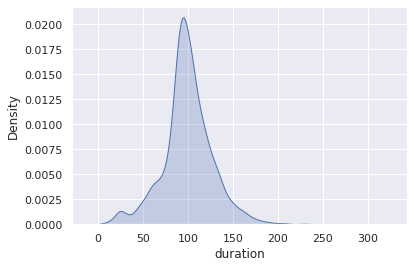

In [41]:
# movie duration (running time) 시각화
sns.set(style="darkgrid")
sns.kdeplot(data=data_movie_dur['duration'], shade=True)

- movie 컨텐츠 중 가장 많은 running time은 90분 전후임을 확인

### type(tv show) - duration

In [42]:
# seasons 삭제
data_tv_dur['duration']=data_tv_dur['duration'].str.replace(' Seasons','')
data_tv_dur['duration']=data_tv_dur['duration'].str.replace(' Season','')

data_tv_dur['duration']=data_tv_dur['duration'].astype(str).astype(int)
data_tv_dur['duration']

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2676, dtype: int64

In [43]:
# movie_duration value count
dur_value_tv = data_tv_dur['duration'].value_counts()
dur_value_tv = dur_value_tv.to_frame()
dur_value_tv.reset_index(inplace=True)
dur_value_tv.columns=['seasons', 'counts']
dur_value_tv

,seasons,counts
0,1,1793
1,2,425
2,3,199
3,4,95
4,5,65
5,6,33
6,7,23
7,8,17
8,9,9
9,10,7


In [44]:
tnd_rate_list = []

for i in dur_value_tv['counts']:    
    rate_mng = (i / 6131)*100
    tnd_rate_list.append(rate_mng)

# movie - 러닝타임별 비율 
dur_value_tv = dur_value_tv.assign(rate = tnd_rate_list)
dur_value_tv

,seasons,counts,rate
0,1,1793,29.244821
1,2,425,6.931985
2,3,199,3.245800
3,4,95,1.549503
4,5,65,1.060186
5,6,33,0.538248
6,7,23,0.375143
7,8,17,0.277279
8,9,9,0.146795
9,10,7,0.114174


- 1 season이 전체의 30%

<AxesSubplot:xlabel='duration', ylabel='Density'>

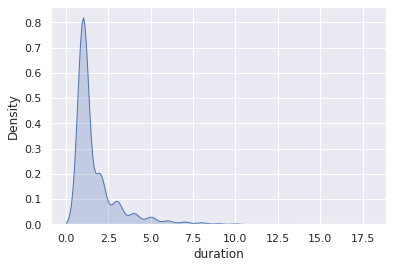

In [45]:
# movie duration (running time) 시각화
sns.set(style="darkgrid")
sns.kdeplot(data=data_tv_dur['duration'], shade=True)

- 그래프에서도 확인 가능
- 3 시즌까지가 거의 대부분
- 7 시즌 이후로 거의 없음
- year data랑 상관성?

## listed_in : Genere

# 데이터 분해

In [46]:
# genre 여러개
condi = data_titles['show_id'].isin(['s2', 's3', 's4', 's8'])
data_titles[condi][['title', 'listed_in']]


,title,listed_in
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,"Docuseries, Reality TV"
7,Sankofa,"Dramas, Independent Movies, International Movies"


In [47]:
# country 여러개
condi = data_titles['show_id'].isin(['s8', 's13', 's30', 's39'])
data_titles[condi][['title', 'listed_in']]


,title,listed_in
7,Sankofa,"Dramas, Independent Movies, International Movies"
12,Je Suis Karl,"Dramas, International Movies"
29,Paranoia,Thrillers
38,Birth of the Dragon,"Action & Adventure, Dramas"


In [48]:
# split (genre)
data_split = split_multi_data_in_col(data_titles, 'listed_in', ', ')
print('split result number (genre) : ', len(data_split))

split result number (genre) :  19323


In [49]:
condi = data_split['show_id'].isin(['s8'])
data_split[condi][['title', 'listed_in']]


,title,listed_in
16,Sankofa,Dramas
17,Sankofa,Independent Movies
18,Sankofa,International Movies


In [50]:
# split (genre, country)
data_split = split_multi_data_in_col(data_split, 'country', ', ')
print('split result number (genre, country) : ', len(data_split))


split result number (genre, country) :  23754


In [51]:
condi = data_split['show_id'].isin(['s8'])
data_split[condi][['title', 'country', 'listed_in']]


,title,country,listed_in
16,Sankofa,United States,Dramas
17,Sankofa,Ghana,Dramas
18,Sankofa,Burkina Faso,Dramas
19,Sankofa,United Kingdom,Dramas
20,Sankofa,Germany,Dramas
21,Sankofa,Ethiopia,Dramas
22,Sankofa,United States,Independent Movies
23,Sankofa,Ghana,Independent Movies
24,Sankofa,Burkina Faso,Independent Movies
25,Sankofa,United Kingdom,Independent Movies


In [52]:
# type별 Data 나누기
data_split_movie = data_split.loc[data_split.type == 'Movie']
data_split_tv = data_split.loc[data_split.type == 'TV Show']


In [53]:
# 장르 리스트
name_genre = data_split['listed_in'].unique()
print('')
print(name_genre)
name_genre_movie = data_split_movie['listed_in'].unique()
print('\n')
print('movie')
print(name_genre_movie)
name_genre_tv = data_split_tv['listed_in'].unique()
print('\n')
print('tv')
print(name_genre_tv)



['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies' 'TV Horror' 'Children & Family Movies'
 'Dramas' 'Independent Movies' 'International Movies' 'British TV Shows'
 'Comedies' 'Spanish-Language TV Shows' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy' 'TV Thrillers'
 "Kids' TV" 'Action & Adventure' 'TV Sci-Fi & Fantasy' 'Classic Movies'
 'Anime Features' 'Sports Movies' 'Anime Series' 'Korean TV Shows'
 'Science & Nature TV' 'Teen TV Shows' 'Cult Movies' 'TV Shows'
 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy' 'Movies'
 'Stand-Up Comedy & Talk Shows' 'Classic & Cult TV']


movie
['Documentaries' 'Children & Family Movies' 'Dramas' 'Independent Movies'
 'International Movies' 'Comedies' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy'
 'Action & Adventure' 'Classic Movies' 'Anime Featu

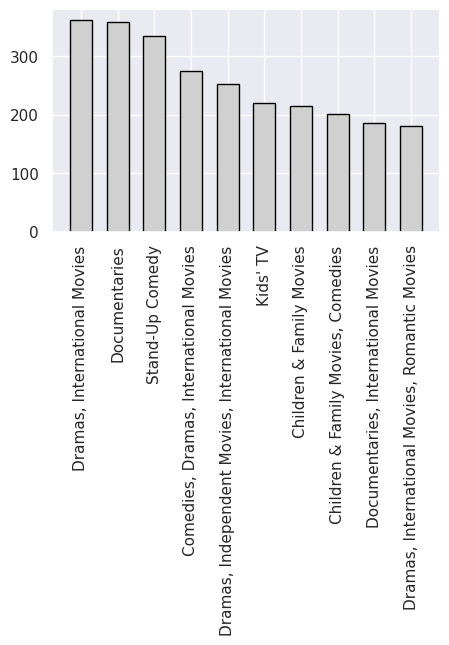

In [54]:
# 장르 분포
cnt_title = data_titles['listed_in'].value_counts()
cnt_title = cnt_title[:10]
fig, _ = make_graph_bar(cnt_title.index, cnt_title, 3, 1, 1)
ratation_tick(90)
set_size_fig(fig, 5, 10, 100)
plt.show()


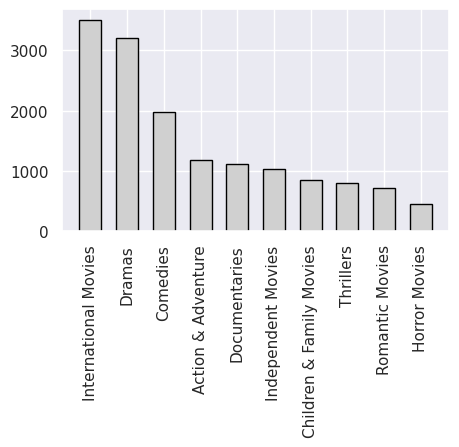

In [55]:
# 장르 분해 해서 분석
# movie
cnt_movie = data_split_movie['listed_in'].value_counts()
cnt_movie = cnt_movie[:10]
fig, _ = make_graph_bar(cnt_movie.index, cnt_movie, 3, 1, 2)
ratation_tick(90)
set_size_fig(fig, 5, 10, 100)
plt.show()


In [56]:
# type별 Data
data_movie = data_titles.loc[data_titles.type == 'Movie']
data_tv = data_titles.loc[data_titles.type == 'TV Show']

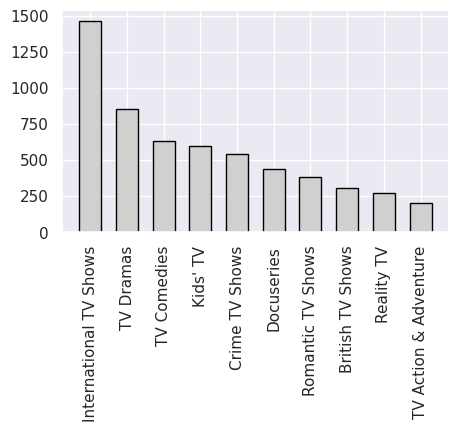

In [57]:
# 장르 분해 해서 분석
# tv show
cnt_tv = data_split_tv['listed_in'].value_counts()
cnt_tv = cnt_tv[:10]
fig, _ = make_graph_bar(cnt_tv.index, cnt_tv, 3, 1, 3)
ratation_tick(90)
set_size_fig(fig, 5, 10, 100)
plt.show()

- 드라마와 코미디 콘텐츠가 많다
- 다음은 티비의 성격과 무비 성격을 보여줌
- 무비는 액션이 다음 많고
- 티비는 키드가 상대적으로 많음 범죄도 많음
